# INFO 371 - Problem Set 2

Due: October 27 2024, 11:59 PM

### Instructions

Before beginning this assignment, please ensure you have access to a working instance of Jupyter Notebooks with Python 3.

1. First, replace the "YOUR NAME HERE" text in the next cell with your own full name. Any collaborators must also be listed in this cell.

2. Be sure to include well-documented (e.g. commented) code cells, figures, and clearly written text  explanations as necessary. Any figures should be clearly labeled and appropriately referenced within the text. Be sure that each visualization adds value to your written explanation; avoid redundancy – you do no need four different visualizations of the same pattern.

3. Collaboration on problem sets and labs is fun, useful, and encouraged. However, each student must turn in an individual write-up in their own words as well as code/work that is their own. Regardless of whether you work with others, what you turn in must be your own work; this includes code and interpretation of results. The names of all collaborators must be listed on each assignment. Do not copy-and-paste from other students’ responses or code - your code should never be on any other student's screen or machine.

4. All materials and resources that you use (with the exception of lecture slides) must be appropriately referenced within your assignment.

5. Partial credit will be awarded for each question for which a serious attempt at finding an answer has been shown. Students are *strongly* encouraged to attempt each question and document their reasoning process even if they cannot find the correct answer. 

6. After completing the assignment, ensure that your code can run from start to finish without issue. Restart the kernal and run all cells to double check.

Name: Trevor Tang

Collaborators: Salley Fang

## Introduction to the assignment

For this assignment, you will be using the [Ames Housing Prices dataset](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627). You can find more on the dataset [here](https://jse.amstat.org/v19n3/decock/DataDocumentation.txt) and the data is available [here](http://jse.amstat.org/v19n3/decock/AmesHousing.xls). Please read about the dataset carefully before continuing. A description of the data is provided below.

In [280]:
import requests
res = requests.get('https://jse.amstat.org/v19n3/decock/DataDocumentation.txt')
print(res.text)

NAME: AmesHousing.txt
TYPE: Population
SIZE: 2930 observations, 82 variables
ARTICLE TITLE: Ames Iowa: Alternative to the Boston Housing Data Set

DESCRIPTIVE ABSTRACT: Data set contains information from the Ames Assessors Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010.

SOURCES: 
Ames, Iowa Assessors Office 

VARIABLE DESCRIPTIONS:
Tab characters are used to separate variables in the data file. The data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers).

Order (Discrete): Observation number

PID (Nominal): Parcel identification number  - can be used with city web site for parcel review. 

MS SubClass (Nominal): Identifies the type of dwelling involved in the sale.	

       020	1-STORY 1946 & NEWER ALL STYLES
       030	1-STORY 1945 & OLDER
       040	1-STORY W/FINISHED ATTIC ALL AGES
       045	1-1/2 STORY - UNFINISHED ALL AGES
   

In [281]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm

## Part 1: Descriptive Analysis

### 1.1 Load the data

Start by loading in the data and storing it as a pandas DataFrame object. Ensure that the shape of the DataFrame matches the description of the data above.

In [282]:
data = pd.read_excel("./AmesHousing.xls")
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### 1.2 Histogram of housing prices

Let's start by creating a histogram of the home sale prices. Ensure that your histogram has the following:

1. Appropriate labels to the x and y axes with units
2. A title at the top of the plot
3. A bin width of \$10000
4. The top and right axes of the plot removed
5. Bars of your color choice but with no black outlines around them

What do you notice about the distribution of sale prices?

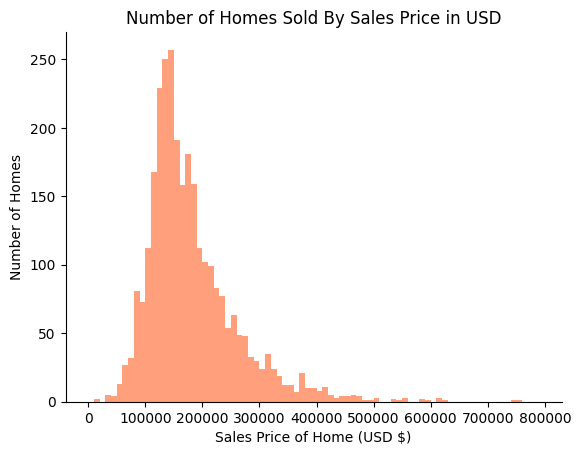

In [283]:
house_price_hist_plot = sns.histplot(data = data["SalePrice"], 
                                     bins = np.arange(0, 800000, 10000), 
                                     color = "coral", 
                                     edgecolor = "none")
_ = house_price_hist_plot.set(xlabel = "Sales Price of Home (USD $)", 
                          ylabel="Number of Homes",
                          title="Number of Homes Sold By Sales Price in USD")
sns.despine()

The distribution of home prices is right skewed with an outlier in the 700,000 to 800,000 price range. Most homes seem to have sold in the 100,000 to 200,000 range.

### 1.3 Scatter plot of home sq ft and sale price

Create a scatter plot that shows the relationship between the home sale price (y-axis) and above grade living area (x-axis). Use transparency to overlay the points. Properly label your axes, and ensure that your graphic looks polished and professional. What do you notice about the data? Is this what you'd expect?

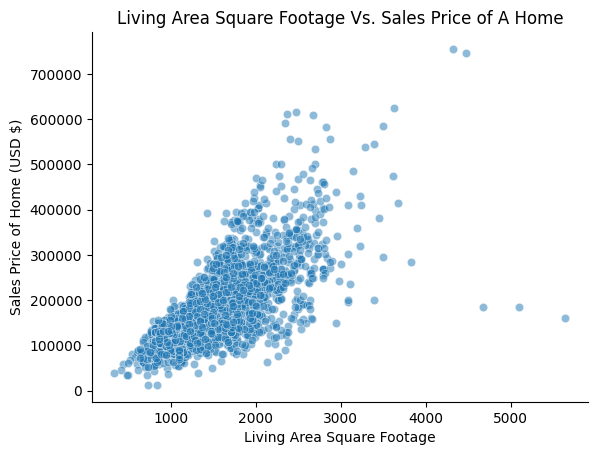

In [284]:
home_graded_price = sns.scatterplot(data=data, 
                                    x="Gr Liv Area", 
                                    y="SalePrice",
                                    alpha = 0.5
                                    )
_ = home_graded_price.set(xlabel = "Living Area Square Footage", 
                          ylabel = "Sales Price of Home (USD $)",
                          title="Living Area Square Footage Vs. Sales Price of A Home")
sns.despine()

Minus the outliers, there is a positive correlation between living area square footage and the sales price of a home. This makes sense because the larger a home is, I would expect you to pay more for it. 

### 1.4 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data. Be creative in your visualization and be sure to produce a "publication-quality" graph. Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes. Include at least three variables (features) in your plot.

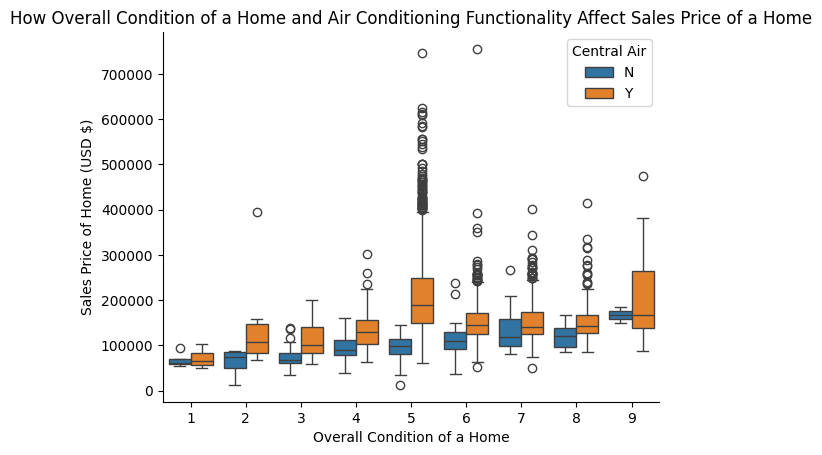

In [285]:
# How does the overall condition of a house (Overall Cond) 
# and whether a house has AC or not (Central Air)
# affect the sales price (SalePrice)?

custom_plot = sns.boxplot(data=data,  
                                    x="Overall Cond", 
                                    y="SalePrice",
                                    hue="Central Air")

_ = custom_plot.set(xlabel = "Overall Condition of a Home", 
                          ylabel = "Sales Price of Home (USD $)",
                          title="How Overall Condition of a Home and Air Conditioning Functionality Affect Sales Price of a Home")
sns.despine()

I decided to graph a side-by-sdide boxplot to observe the relationship between having air conditioning and the overall condition of a home (scored from 1 - 10) on the x-axis and sales price on the y-axis. Based on my plot, we can see that homes with no air conditioning tend to have a lower average sales price than homes that do have air conditioning. Similarly, we can see that there is a slight positive correlation between overall condition and the sales price of a home. 

## Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the sale price for an instance in the data.

### 2.1 Data processing

Let's start by processing our data by performing the following steps:

- You are given a list of columns in the next cell. Drop all of these columns in their entirety from the data (be sure to preserve a copy of your original dataset in case you need it later). 
- Filter your data to where `Sale Condition` only has the value of 'Normal'
- Remove any instances where the `MS Zoning` variable is agricultural, commercial, or industrial
- Lastly, remove any observations that contain a missing value in any column

What is the final size of your dataset?

In [286]:
cols = ['Order', 'PID', 'Lot Frontage', 'Alley', 'Fireplace Qu', 'Pool QC', 
        'Fence', 'Misc Feature', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
        'Garage Qual', 'Garage Cond']

In [287]:
data_processed = data.drop(labels=cols, axis=1)
data_processed.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed 

In [288]:
data_processed = data_processed[data_processed["Sale Condition"] == "Normal"]
data_processed["Sale Condition"].unique()

array(['Normal'], dtype=object)

In [289]:
data_processed = data_processed[~(data_processed["MS Zoning"].isin(["A (agr)", "C (all)", "I (all)"]))]
data_processed["MS Zoning"].unique()

array(['RL', 'RH', 'FV', 'RM'], dtype=object)

In [290]:
data_processed.shape # BEFORE REMOVING NA (sanity check part 1)

(2397, 69)

In [291]:
data_processed = data_processed.dropna()
data_processed.shape # AFTER REMOVING NA (sanity check part 2)

(908, 69)

Our final dataset has **908 rows** and **69 columns**

### 2.2 Add dummies

Many of our variables are encoded as nominal variables. However, we need numeric values for much of the work we'll be doing going forward. To correct for this, we'll create [dummy variables](https://en.wikipedia.org/wiki/Dummy_variable_(statistics)). These are one-hot-encoded representations of our nominal variables. 

Create dummy variables for all the nominal variables in the data. What is the shape of your data now?

(Hint: pandas has functions that allow you to easily create dummy variables)

In [292]:
data_processed.columns
# Nominal columns: columns=["MS SubClass", "MS Zoning", "Street", 
# "Land Contour", "Lot Config", "Neighborhood", "Condition 1", "Condition 2",
# "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", "Exterior 2nd",
# "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Sale Type", "Sale Condition"]

# Ordinal Columns: Lot Shape, Utilities, Land Slope, Exter Qual, Exter Cond,
# Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 2, Heating QC, Electrical,
# Kitchen Qual, Functional, Paved Drive

Index(['MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed 

In [293]:
data_processed = pd.get_dummies(data=data_processed) # Pass in the entire dataframe just to be sure we convert nomial and ordinal variables
data_processed.shape

(908, 209)

Our dataset now has **908 rows** and **209 columns**

### 2.3 Regression

Next, use statsmodels' OLS to explore the relationship between home sale price and total number of rooms (above grade/ground) per house. Do this by first (a) regressing the housing price on the total number of rooms and then (b) regressing the housing price on the number of rooms per house and the number of rooms per house squared (i.e.  $y = \beta_0 + \beta_1x + \beta_2x^2$).  Interpret the results of your regression model.

In [294]:
# (a) housing price (y) on total number of rooms (X)

model = sm.OLS.from_formula('SalePrice ~ Q("TotRms AbvGrd")', data=data_processed).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     362.5
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           3.04e-68
Time:                        20:09:26   Log-Likelihood:                -11407.
No. Observations:                 908   AIC:                         2.282e+04
Df Residuals:                     906   BIC:                         2.283e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.281e+04   1.07e+04      1.202      0.230   -8107.324    3.37e+04
Q("TotRms AbvGrd")  2.948e+04   1548.170     19.039      0.000    2.64e+04    3.25e+04
==============================================================================
Omnibus:                      258.614   Durbin-Watson:                   1.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1084.601
Skew:                           1.277   Prob(JB):                    3.03e-236
Kurtosis:                       7.706   Cond. No.                         32.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The intercept is uninteresting as it is not statistically significant. However, it is our baseline as we can say that the average sale price for the baseline number of rooms is $12,810. However, our beta coefficient indicates that when we consider the total number of rooms that are above grade in a house, there is an average increase of $29,480 in the sales price of a home.

In [295]:
# (b) housing price (y) on total number of rooms (X) 
# and total number of rooms squared (X**2)

model = sm.OLS.from_formula('SalePrice ~ Q("TotRms AbvGrd") + np.power(Q("TotRms AbvGrd"), 2)', data=data_processed).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     181.4
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           5.65e-67
Time:                        20:09:26   Log-Likelihood:                -11407.
No. Observations:                 908   AIC:                         2.282e+04
Df Residuals:                     905   BIC:                         2.283e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        3.596e+04   3.42e+04      1.051      0.294   -3.12e+04    1.03e+05
Q("TotRms AbvGrd")               2.269e+04   9658.271      2.349      0.019    3733.587    4.16e+04
np.power(Q("TotRms AbvGrd"), 2)   474.1409    665.969      0.712      0.477    -832.883    1781.165
==============================================================================
Omnibus:                      254.180   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1075.870
Skew:                           1.250   Prob(JB):                    2.39e-234
Kurtosis:                       7.710   Cond. No.                         811.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The intercept has the same reasoning as part (a). It states that the average baseline sales price for a home is $35,960. The non-squared beta coefficient indicates that when we consider the total number of above grade rooms in a home, the average sales price increases by $22,690. Finally, the squared beta coefficient indicates that when we square the total number of above grade rooms in a home, the average sales price increases by $474. However, this value is not statistically significant.

### 2.4 Training-test splits

We used all of your data to fit the regression line(s) in the above problems. In some circumstances and smaller datasets, this is a reasonable thing to do. Often, however, this will result in overfitting. Let's work on building a predictive model of home sale price using some machine learning approaches. 

To start, randomly select 80% of the data and put this in a training dataset and place the remaining 20% in a testing dataset. What are the dimensions of your training and test set? (Remember to set a random seed)

In [296]:
from sklearn.model_selection import train_test_split

In [297]:
y = data_processed["SalePrice"]
X = data_processed.drop(columns="SalePrice")

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
y_train.head()  

1264    148000
1858    187000
976     160000
2762    181000
1030    205000
Name: SalePrice, dtype: int64

In [299]:
X_train.shape, X_test.shape

((726, 208), (182, 208))

Both the training and test sets have **208 columns**, but the training set has **726 rows** while the test set has **182 rows**

### 2.5 Create naive baseline

Create a model that predicts, for every observation $x_i$, that the home sale price is the average (mean) of the sale price for all instances in the training set. Compute the RMSE on the training set. Now compute the RMSE on the test data set (but use the model you trained on the training set!). What do your results look like?

In [300]:
from sklearn.metrics import root_mean_squared_error

In [301]:
# Create our naive prediction
training_price_mean = np.mean(y_train)

y_train_naive_predictions = training_price_mean.repeat(len(y_train))
y_test_naive_predictions = training_price_mean.repeat(len(y_test))

In [302]:
y_train_naive = root_mean_squared_error(y_train, y_train_naive_predictions)
print(y_train_naive)

83682.69947335703


In [303]:
y_test_naive = root_mean_squared_error(y_test, y_test_naive_predictions)
print(y_test_naive)

74095.5749556065


The RMSE for the training set is about 83,682.70, while the RMSE for the test set is about 74,095.57. These are relatively very high!

## Part 3: Ridge Regression

Next, let's start making predictions by building a ridge regression model.

### 3.1 Linear regression

Let's start by building a linear regression model for predictions (i.e. use sklearn's LinearRegression). For now, don't worry about overfitting. Simply create a model that uses all the features in your data to predict the sale price of a home. What is your RMSE on the test set? How does this compare to the naive baseline?

In [304]:
from sklearn.linear_model import LinearRegression

In [305]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [306]:
preds = model.predict(X_test)
print(root_mean_squared_error(y_test, preds))

25130.830147466135


The RMSE for our test set is much smaller than our naive baseline's RMSE (74,095.57 vs. 25,130.83). However, this makes sense considering that now we have differing sale prices for each home meaning that not all houses are going to be predicted to have the same sales price.

### 3.2 Find optimal alpha

Next, build a ridge regression model. Tune the regularization strength using 5-fold cross validation and find the hyperparameter with the lowest RMSE value. Use alpha values between 0.001 and 100 in your cross-validation search - the gradations/steps between alpha values are up to you. Keep in mind that making your search more exhaustive will increase computation time. What is your final alpha value?

A few hints:
- It can help to start broad for alpha values and then do a second sweep using something more fine
- Be sure to look at the cross-validation and grid search functions available to you from sklearn - don't reinvent the wheel here
- If you take an approach where you create your own scorer using the `make_scorer` function in sklearn, be sure to indicate whether greater is better or worse

In [307]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [308]:
# Alpha range defined to be 0 through 20 with step 0.1
alphas = [x / 10 for x in range(0, 200)]

In [309]:
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)

In [310]:
grid_search = GridSearchCV(Ridge(), param_grid={'alpha' : alphas},
                           scoring=rmse_scorer, cv=5)

grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_ * -1

print("Alpha:", best_alpha, "RMSE:", best_score)

Alpha: 5.0 RMSE: 22717.254291582394


The alpha value that gives the lowest RMSE is when alpha = 5, the RMSE is 22,717.25 Note that I do not add anymore significant digits because the RMSE's units are in USD.

### 3.3 Create ridge regression model

Using your alpha value from your cross-validation search, create a ridge regression model. Use this model to predict home sale price for the test data. What is your RMSE on the test set? How does it compare to your naive baseline and your linear regression model?

In [311]:
model = Ridge(alpha = 5.0)

In [312]:
model.fit(X_train, y_train)

Ridge(alpha=5.0)

In [313]:
preds = model.predict(X_test)

In [314]:
print(root_mean_squared_error(y_test, preds))

21837.786104174345


The RMSE on our test set is 21,837.79. From our naive baseline, the RMSE for the test set was around 74,095.57, and for our linear regression model, it was 25,130.83. Optimizing our alpha in our ridge regression model outperformed our other tests!

### 3.4 (Optional - extra credit) Create tuning plot

Using the results from your cross-validation search, create a plot that shows the mean RMSE across all folds on the y-axis and the model complexity (i.e. alpha value) on the x-axis. What does your plot look like? 

(Hint: remove any outlier values for RMSE before plotting)

In [315]:
y_RMSE_graph = pd.DataFrame(grid_search.cv_results_)['mean_test_score'] * -1

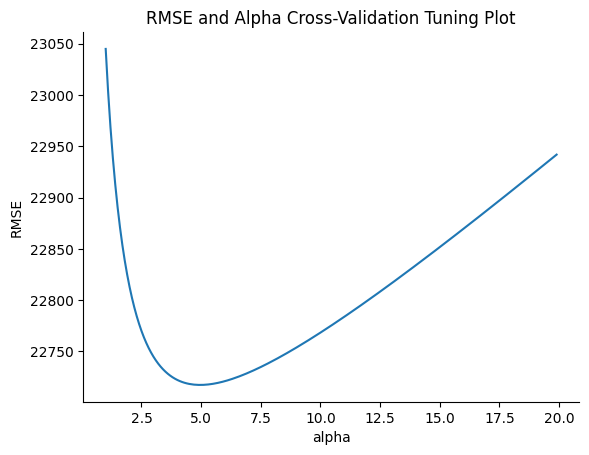

In [316]:
alpha_graph = [x / 10 for x in range(0, 200)]
graph_data = pd.DataFrame(data = {"alpha": alpha_graph[1:], 'RMSE': y_RMSE_graph[1:]}) # Index from 1 because 0 is an RMSE outlier

q_1 = np.percentile(y_RMSE_graph, 25)
q_3 = np.percentile(y_RMSE_graph, 75)
iqr = q_3 - q_1

lower_bound = q_1 - (1.5 * iqr)
upper_bound = q_3 + (1.5 * iqr)

filtered_graph_data = graph_data[(graph_data['RMSE'] >= lower_bound) & (graph_data['RMSE'] <= upper_bound)]


CV_tuning_plot = sns.lineplot(data = filtered_graph_data, x = 'alpha', y = 'RMSE')
_ = CV_tuning_plot.set(title="RMSE and Alpha Cross-Validation Tuning Plot")
sns.despine()

The plot initially shows a steep decline but then a slight incline. I would like to note that we found our minimum RMSE at alpha = 5. In our graph, this seems to be the lowest or flattest point, so my algorithm above was correct about finding the minimum alpha value. 

## Part 4: K-NN

Next, let's make predictions using a K-nearest neighbors model.

### 4.1 Single neighbor

To start, build a model using a single neighbor (i.e. K = 1) and train it on the same training data that you used in Part 3. How does your model fare on the test set that you used for the ridge regression model? How do the results compare to your previous predictions/models?

In [317]:
from sklearn.neighbors import KNeighborsRegressor

In [318]:
knn = KNeighborsRegressor(n_neighbors=1)

In [319]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [320]:
preds = knn.predict(X_test)

In [321]:
RMSE_KNN = root_mean_squared_error(y_test, preds)
print(RMSE_KNN)

48433.45405670173


The RMSE for my nearest neighbor model on my test set is 48,653.49. In my optimized ridge model, the RMSE was 21,907.30. While my current RMSE is very high for a hyperparameter of 1 neighbor, the RMSE for my optimized ridge model is also super high, so I am curious to compare it with an optimized number of neighbors. 

### 4.2 Find optimal number of neighbors

Next, use 5-fold cross validation to determine the optimal number of neighbors to use in the model. Use neighbor values between 1 and 20 in your search. What is your final value for the number of neighbors?

In [322]:
neighbors = [x for x in range(1, 21)]

In [323]:
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid={'n_neighbors' : neighbors},
                           scoring=rmse_scorer, cv=5)

grid_search.fit(X_train, y_train)

best_neighbors = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_ * -1

print("Neighbors:", best_neighbors, "RMSE:", best_score)

Neighbors: 4 RMSE: 49928.199279980035


The best value for the number of neighbors is 4. The RMSE for this number of neighbors came out to be 49,928.20

### 4.3 Create K-NN model

Using your neighbor value from your cross-validation search, create a K-NN model. Use this model to predict home sale price for the same test data that you have been using. What is your RMSE on the test set? How does it compare to your naive K-NN model? What about your ridge regression model(s)?

In [324]:
model = KNeighborsRegressor(n_neighbors = 4)

In [325]:
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [326]:
preds = model.predict(X_test)

In [327]:
print(root_mean_squared_error(y_test, preds))

42291.17958836016


The RMSE on our test set is 42,291.18. Compared to our naive K-NN model, the RMSE was 48,433.45. For our optimized ridge regression model, the RMSE was 21,837.79. Our ridge regression model still performs best, which might mean that ridge regression might be the best algorithm choice for our prediction model.

### 4.4 Scaling

You may have noticed that we did not do any feature scaling when building our nearest neighbor model. Let's scale our training data using a min-max scaler (you're welcome to use the sklearn version). Use the same scaler to then transform the test data (i.e. "fit" the scaler on the training data and then transform the training data and the test data). Be sure to store the scaled datasets in a separate variable (i.e. don't overwrite your train and test datasets). 

What is this scaler doing? Why do you think it's important to transform the test data using the scaler fit to the training data? 

In [328]:
from sklearn.preprocessing import MinMaxScaler

In [329]:
scaler = MinMaxScaler()

In [330]:
scaler_model = scaler.fit(X_train)

In [331]:
X_train_transformed = scaler_model.transform(X_train)

In [332]:
X_test_transformed = scaler_model.transform(X_test)

The scaler is transforming our data into a more relative scale. In this case, it is between 0 and 1. We do this to normalize the relative distance between each our explanatory variables. In general, the distance for nominal and ordinal variables can be hard to generalize to all variables, so we have to put it on a measurable scale we can compute distance metrics on. I think that it is important to also transform our test data with our scalar as we have done with our training data because our model is now using data that is at a different scale, so it makes sense to do the same for our test data since it comes from the same dataset. This makes prediction more effective for unseen data (since we are doing unsupervised learning too) as the test data is now more representative of the training data (which we did train our model on).

### 4.5 (Again) Find optimal number of neighbors

Next, use the scaled data and 5-fold cross validation to determine the optimal number of neighbors to use in the model. Use neighbor values between 1 and 20 in your search. What is your final value for the number of neighbors? Does this differ from the number of neighbors you used in the unscaled model?

In [333]:
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid={'n_neighbors' : neighbors},
                           scoring=rmse_scorer, cv=5)

grid_search.fit(X_train_transformed, y_train)

best_neighbors = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_ * -1

print("Neighbors:", best_neighbors, "RMSE:", best_score)

Neighbors: 7 RMSE: 38673.79396937738


In [334]:
grid_search.cv_results_['mean_test_score']

array([-46041.76412728, -41891.78923035, -40320.1081965 , -38821.02566581,
       -39000.71367168, -38915.96933075, -38673.79396938, -39225.74345051,
       -39334.03651386, -39569.8069029 , -39789.45936577, -40115.86826464,
       -40496.83723428, -40905.58872527, -41206.19959517, -41376.92725901,
       -41534.32068973, -41966.90678016, -42342.15993694, -42589.6447901 ])

Using the scaled training data, the most optimal number of neighbors of 7 which has an RMSE of 38,673.79. This number differs from before, as before scaling, the optimized number of neighbors was 4. 

### 4.6 (Again) Create K-NN model

Using your neighbor value from your cross-validation search and your scaled data, create a K-NN model. Use this model to predict home sale price for the test data. What is your RMSE on the test set? How does it compare to your other K-NN models? What about your ridge regression model(s)?

In [335]:
model = KNeighborsRegressor(n_neighbors = 7)

In [336]:
model.fit(X_train_transformed, y_train)

KNeighborsRegressor(n_neighbors=7)

In [337]:
preds = model.predict(X_test_transformed)

In [338]:
print(root_mean_squared_error(y_test, preds))

33204.217504590786


The RMSE in our scaled K-NN model is now 33,204.22. Our naive K-NN model's RMSE was 48,433.45, while our non-scaled optimized K-NN model's RMSE was 42,291.18. While our scaled K-NN model outperforms the other K-NN models, it does not outperform our optimized ridge regression model, which has an RMSE of 21,837.79

### 4.7 (Optional - extra credit) Create tuning plot

Similar to what you were asked to do in 3.4, using the results from your cross-validation search, create a plot that shows mean RMSE across all folds on the y-axis and the model complexity (i.e. number of neighbors) on the x-axis. What does your plot look like? You are free to use the scaled or unscaled model outputs.

In [339]:
y_RMSE_graph = pd.DataFrame(grid_search.cv_results_)['mean_test_score'] * -1

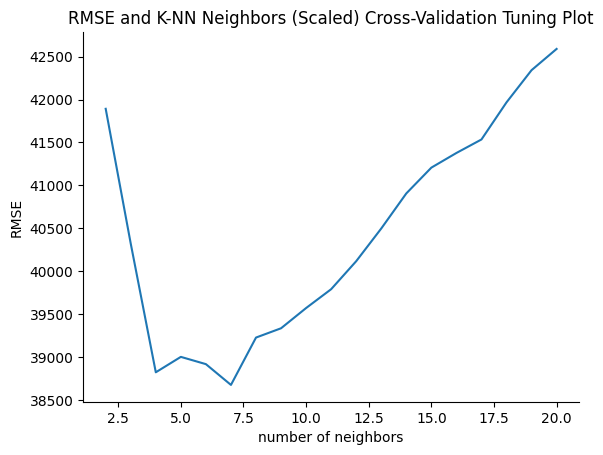

In [340]:
neighbors_graph = [x for x in range(1, 21)]
graph_data = pd.DataFrame(data = {"number of neighbors": neighbors_graph, 'RMSE': y_RMSE_graph})

q_1 = np.percentile(y_RMSE_graph, 25)
q_3 = np.percentile(y_RMSE_graph, 75)
iqr = q_3 - q_1

lower_bound = q_1 - (1.5 * iqr)
upper_bound = q_3 + (1.5 * iqr)

filtered_graph_data = graph_data[(graph_data['RMSE'] >= lower_bound) & (graph_data['RMSE'] <= upper_bound)]

CV_tuning_plot = sns.lineplot(data = filtered_graph_data, x = 'number of neighbors', y = 'RMSE', )
_ = CV_tuning_plot.set(title="RMSE and K-NN Neighbors (Scaled) Cross-Validation Tuning Plot")
sns.despine()

The plot is rather parabolic, and we can see the lowest point is around 7 neighbors which is where our scaled K-NN model was most optimized. 